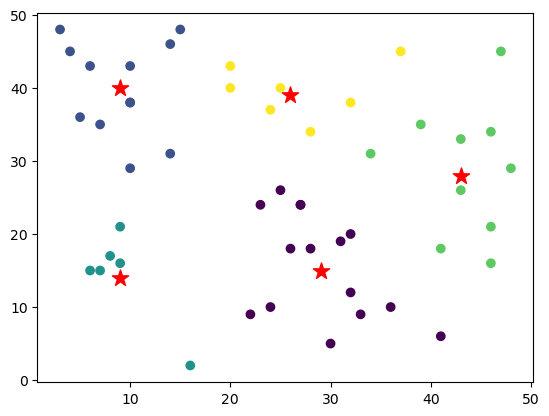

In [143]:
#Comp7404 project
## Kmeans++
# -*- coding:utf-8 -*-
import numpy as np
import random
from matplotlib import pyplot


class K_Means(object):
    def __init__(self,k=2,max_iter=500,init='random'):
        self.k=k
        self.max_iter=max_iter
        self.clf={}
        self.centroid=[]
        self.init=init
        self.label=[]
    def data_init(self,data):
        if self.init=='random':
            self.data_init_random(data)
        else:
            self.data_init_kmeanpp(data)
    def data_init_random(self,data):
        lista= np.random.choice(np.arange(data.shape[0]),self.k,replace=False)
        self.centroid=data[lista]
        
    def data_init_kmeanpp(self,data):
        #select the first centroid
        lista= np.random.choice(np.arange(data.shape[0]),1)
        #calculate distance from each point to the nearest centroid
        distance=np.zeros(data.shape[0])
        for i in range(1,self.k):
            for j,x in enumerate(data):
                #for each data point compute the distance with the nearest centroid
                distance[j]=np.min([np.linalg.norm(x-data[c])for c in lista])
        #compute the probability according to the distance between each point and its corresponding nearest centroid
        #the point with largest distance weighted the most
            prob=distance**2/np.sum(distance**2)
        #random choose a new centroid index according to the probability
            lista=np.append(lista,np.random.choice(data.shape[0],1,p=prob))
        
        self.centroid=data[lista]
        
    def fit(self,data):
        self.label=np.zeros(data.shape[0])       
        self.data_init(data)
        for i in range(self.max_iter):
            self.clf={}
            for j in range(self.k):
                self.clf[j]=[]
                
            for p in range(data.shape[0]):
                
                distance=[]
                for centroid in self.centroid:
                    distance.append(np.linalg.norm(data[p]-centroid))
                    
                clas=np.argmin(distance)
                self.clf[clas].append(data[p])
                self.label[p]=clas
               
            pre_centroid=np.array(self.centroid)
            for clas in  list(self.clf.keys()):
                self.centroid[clas]=np.average(self.clf[clas],axis=0)
            if np.sum(np.abs(pre_centroid-self.centroid))==0:
                break
                    

if __name__ == '__main__':
    #x = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11],[10,10],[3,8]])
    k_means = K_Means(k=5,init='kmeanpp')
    k_means.fit(x)
    center=np.arange(k_means.centroid.shape[0])
    pyplot.scatter(x[:,0], x[:,1], c=k_means.label)
    pyplot.scatter(k_means.centroid[:,0], k_means.centroid[:,1], marker='*',c='r', s=150)

    pyplot.show()        

C:\Users\15214\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


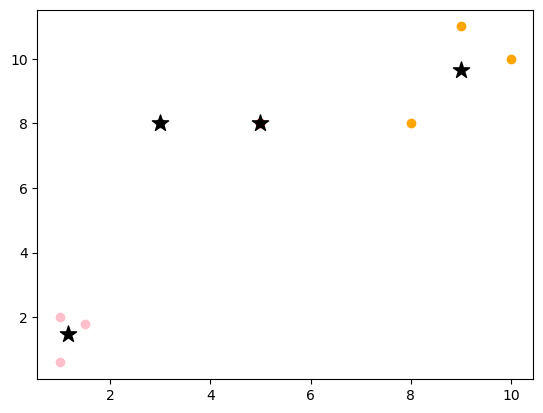

In [2]:
from sklearn.cluster import KMeans
import numpy as np
n_clusters=4
cluster = KMeans(n_clusters=n_clusters,init='random',n_init=1).fit(x)
centroid=cluster.cluster_centers_
centroid
y_pred = cluster.labels_#获取训练后对象的每个样本的标签    
centtrod = cluster.cluster_centers_
color=['red','pink','orange','gray']
fig, axi1=pyplot.subplots(1)
for i in range(n_clusters):
    axi1.scatter(x[y_pred==i, 0], x[y_pred==i, 1],
               marker='o',
               c=color[i])
axi1.scatter(centroid[:,0],centroid[:,1],marker='*',c='black',s=150)

In [124]:
x=np.random.randint(2,50,size=(50,2))
print(x)

[[46 21]
 [20 40]
 [32 12]
 [48 29]
 [47 45]
 [24 37]
 [27 24]
 [ 4 45]
 [10 38]
 [46 34]
 [34 31]
 [25 40]
 [28 18]
 [ 3 48]
 [ 9 21]
 [27 24]
 [ 9 16]
 [41  6]
 [22  9]
 [41 18]
 [ 5 36]
 [46 16]
 [ 6 43]
 [31 19]
 [ 8 17]
 [37 45]
 [32 20]
 [16  2]
 [24 10]
 [43 33]
 [26 18]
 [14 46]
 [33  9]
 [39 35]
 [ 7 35]
 [28 34]
 [15 48]
 [ 7 15]
 [23 24]
 [10 38]
 [10 29]
 [10 43]
 [20 43]
 [32 38]
 [30  5]
 [36 10]
 [43 26]
 [ 6 15]
 [25 26]
 [14 31]]


In [4]:
print(x[1])

[0.18517097 0.06341145]


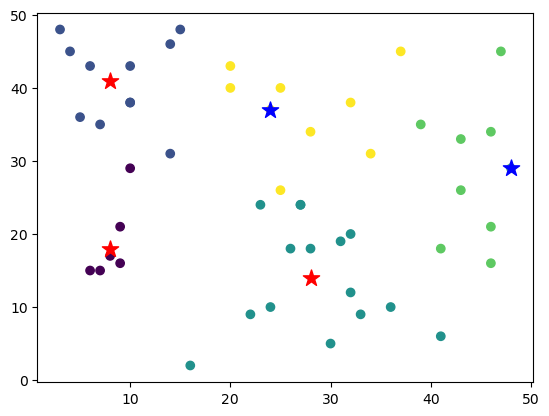

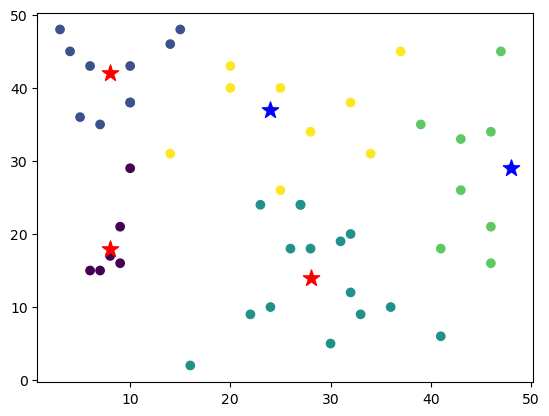

3


In [127]:
#Comp7404 project
## Kmeans++
# -*- coding:utf-8 -*-
import numpy as np
import random
from matplotlib import pyplot


class FC_K_Means(object):
    def __init__(self,k=2,f=0,max_iter=500,function_type='FC'):
        self.k=k
        self.max_iter=max_iter
        self.clf={}
        self.centroid=[]
        self.fix_centroid=[]
        self.function_type=function_type
        self.f=f
        self.label=[]
    def fit(self,data,fix_centroid=None):
        if self.function_type=='FC':
            self.FC_kmeans(data,fix_centroid)
        else:
            self.FC_kmeans2(data,fix_centroid)
    def data_init_random(self,data):
        lista= np.random.choice(np.arange(data.shape[0]),self.k,replace=False)
        self.centroid=data[lista]
        
    def data_init_kmeanpp(self,data):
        #select the first centroid
        lista= np.random.choice(np.arange(data.shape[0]),1)
        #calculate distance from each point to the nearest centroid
        distance=np.zeros(data.shape[0])
        for i in range(1,self.k):
            for j,x in enumerate(data):
                #for each data point compute the distance with the nearest centroid
                distance[j]=np.min([np.linalg.norm(x-data[c])for c in lista])
        #compute the probability according to the distance between each point and its corresponding nearest centroid
        #the point with largest distance weighted the most
            prob=distance**2/np.sum(distance**2)
        #random choose a new centroid index according to the probability
            lista=np.append(lista,np.random.choice(data.shape[0],1,p=prob))
        
        self.centroid=data[lista]
        
        
    def FC_kmeans(self,data,fix_centroid):
        #initialize k center by kmeans++
        self.label=np.zeros(data.shape[0])
        self.data_init_kmeanpp(data)
        self.fix_centroid=fix_centroid
        #perform a normal kmeans update in phase I
        for i in range(self.max_iter):
            self.clf={}
            for j in range(self.k):
                self.clf[j]=[]
            for p in data:
                
                distance=[]
                for centroid in self.centroid:
                    distance.append(np.linalg.norm(p-centroid))
                    
                clas=np.argmin(distance)
                self.clf[clas].append(p)
               
            pre_centroid=np.array(self.centroid)
            for clas in self.clf:
                self.centroid[clas]=np.average(self.clf[clas],axis=0)
            if np.sum(np.abs(pre_centroid-self.centroid))==0:
                break
                    
        #phase II
        #calculate the mean distance from a non-fix center to all fix center
        distance=np.zeros(self.k)
        for i in range(self.k):
            distance[i]=np.average([np.linalg.norm(self.centroid[i]-fix_centroid)for fix_centroid in self.fix_centroid])
        #delete f number of non_fix center which is closest to fix_center
        for i in range(self.f):
            self.centroid=np.delete(self.centroid,np.argmin(distance),0)
            distance=np.delete(distance,np.argmin(distance))
        #merge
        self.centroid=np.concatenate((self.centroid,self.fix_centroid),axis=0)
        
        #compute the normal kmeans for nonfix center
        for i in range(self.max_iter):
            self.clf={}
            for j in range(self.k):
                self.clf[j]=[]
            for p in range(data.shape[0]):
                
                distance=[]
                for centroid in self.centroid:
                    distance.append(np.linalg.norm(data[p]-centroid))
                    
                clas=np.argmin(distance)
                self.clf[clas].append(data[p])
                self.label[p]=clas
            pre_centroid=np.array(self.centroid)
            for clas in list(self.clf.keys())[:(self.k-self.f)]:
                self.centroid[clas]=np.average(self.clf[clas],axis=0)
            if np.sum(np.abs(pre_centroid-self.centroid))==0:
                break
    def FC_kmeans2(self,data,fix_centroid):
        
        #phase I
        #select f number of fix centroid
        self.label=np.zeros(data.shape[0])
        self.fix_centroid=fix_centroid
        lista=np.array([],dtype=int)
        for i in self.fix_centroid:
            lista=np.append(lista,(np.where((data == i).all(1))[0][0]))
        #calculate distance from each point to the nearest centroid
        distance=np.zeros(data.shape[0])
        for i in range(self.f,self.k):
            for j,x in enumerate(data):
                #for each data point compute the distance with the nearest centroid
                distance[j]=np.min([np.linalg.norm(x-data[c])for c in lista])
        #compute the probability according to the distance between each point and its corresponding nearest centroid
        #the point with largest distance weighted the most
            prob=distance**2/np.sum(distance**2)
        #random choose a new centroid index according to the probability
            lista=np.append(lista,np.random.choice(data.shape[0],1,p=prob))
        #merge
        lista=np.concatenate((lista[self.f:self.k],lista[:self.f]),axis=0)
        self.centroid=data[lista]
                    
        #phase II
        #calculate the mean distance from a non-fix center to all fix cente
        
        #compute the normal kmeans for nonfix center
        for i in range(self.max_iter):
            self.clf={}
            for j in range(self.k):
                self.clf[j]=[]
            for p in range(data.shape[0]):
                
                distance=[]
                for centroid in self.centroid:
                    distance.append(np.linalg.norm(data[p]-centroid))
                    
                clas=np.argmin(distance)
                self.clf[clas].append(data[p])
                self.label[p]=clas
            pre_centroid=np.array(self.centroid)
            for clas in list(self.clf.keys())[:(self.k-self.f)]:
                self.centroid[clas]=np.average(self.clf[clas],axis=0)
            ##stop criteria check
            if np.sum(np.abs(pre_centroid-self.centroid))==0:
                break
                
                
                
                
if __name__ == '__main__':
    fx=[x[3],x[5]]

    k_means = FC_K_Means(k=5,f=2,max_iter=1000,function_type='FC')
    k_means.fit(data=x,fix_centroid=fx)
    center=np.arange(k_means.centroid.shape[0])
    pyplot.scatter(x[:,0], x[:,1], c=k_means.label)
    pyplot.scatter(k_means.centroid[:(k_means.k-k_means.f),0], k_means.centroid[:(k_means.k-k_means.f),1], marker='*',c='r', s=150)
    pyplot.scatter(k_means.centroid[(k_means.k-k_means.f):,0], k_means.centroid[(k_means.k-k_means.f):,1], marker='*',c='b', s=150)    
    pyplot.show()   
    k_means1 = FC_K_Means(k=5,f=2,max_iter=1000,function_type='FC2')
    k_means1.fit(data=x,fix_centroid=fx)
    center=np.arange(k_means1.centroid.shape[0])

    pyplot.scatter(x[:,0], x[:,1], c=k_means1.label)
    pyplot.scatter(k_means1.centroid[:(k_means1.k-k_means1.f),0], k_means1.centroid[:(k_means1.k-k_means1.f),1], marker='*',c='r', s=150)
    pyplot.scatter(k_means1.centroid[(k_means1.k-k_means1.f):,0], k_means1.centroid[(k_means1.k-k_means1.f):,1], marker='*',c='b', s=150)    
    pyplot.show()   
    print(cat)

In [74]:
print(np.array(k_means1.clf[1]))

[[31 34]
 [34 46]
 [25 36]
 [28 35]
 [38 46]
 [34 49]
 [30 37]
 [31 33]
 [30 47]
 [31 43]
 [33 39]
 [39 41]
 [35 36]
 [41 45]
 [30 49]
 [42 49]
 [25 41]
 [40 44]
 [30 38]
 [44 43]
 [37 40]]


In [30]:
print(k_means.centroid)
print(k_means1.centroid)

[[17 13]
 [35 38]
 [ 4 34]
 [39 12]
 [ 7 34]]
[[35 38]
 [17 14]
 [ 4 34]
 [39 12]
 [ 7 34]]


In [6]:
a=np.array([[0,1],[0,3],[3,3]])
b=np.array([[0,2],[0,5]])
a=np.concatenate((a,b),axis=0)
print(a)

[[0 1]
 [0 3]
 [3 3]
 [0 2]
 [0 5]]


In [46]:
clf={}
for i in range(10):
    clf[i]=[[i-1,i],[i,i+1]]
print(np.array(clf[4])[:,0])

[3 4]


In [8]:
lista=list(np.where((a == b[0])))
print(np.where((a == b[0])))

(array([0, 1, 3, 3, 4], dtype=int64), array([0, 0, 0, 1, 0], dtype=int64))


In [9]:
w=np.array([])
for i in b:
    w=np.append(w,int(np.where((a == i).all(1))[0][0]))
print(w)
for c in w:
    print (c.dype())

[3. 4.]


AttributeError: 'numpy.float64' object has no attribute 'dype'